<a href="https://colab.research.google.com/github/sympony/Education/blob/main/n122_chi_square_test_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 2*

# 📝 Assignment

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,511 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and d

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

# 설정 변환을 위해서 matplotlib만 import
import matplotlib as mpl

# Windows
# mpl.rc("font", family='Malgun Gothic')

# MacOS
mpl.rc("font", family='AppleGothic')


import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 카이제곱검정


## 1. 공공데이터 조작 연습. 

국가 통계 포털에서 아래 이미지를 참조하여

<https://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE&parmTabId=M_01_01#SelectStatsBoxDiv>

**2020년 8월**에 해당하는 규모별 미분양현황 에 대한 데이터셋을 생성하세요. 

<img src='https://i.imgur.com/aZc4UJO.png' width = 500>

- `60m이하`, `60~85m`, `85m초과`의 3개 규모와 (column)
- `서울`, `대전`, `대구`, `부산` 4개의 지역을 포함해야합니다. (row)
- `민간부문`만 포함합니다
- 데이터가 없는 경우는 0으로 처리하세요.

이후 데이터셋을 colab으로 불러오세요. 이때 변수의 이름은 `df`를 사용합니다.


In [5]:
rocal = '/content/drive/MyDrive/Colab Notebooks/data_file/규모별_미분양현황.csv'
data = pd.read_csv(rocal, encoding='CP949')
data.head()

,시도(1),부문(1),규모(1),2020. 08
0,서울,민간부문,60㎡이하,54
1,서울,민간부문,60∼85㎡,2
2,서울,민간부문,85㎡초과,0
3,부산,민간부문,60㎡이하,577
4,부산,민간부문,60∼85㎡,735


In [6]:
data.drop(columns='부문(1)', inplace=True)
data.head()

,시도(1),규모(1),2020. 08
0,서울,60㎡이하,54
1,서울,60∼85㎡,2
2,서울,85㎡초과,0
3,부산,60㎡이하,577
4,부산,60∼85㎡,735


In [7]:
# tidy형태의 table을 wide_table로 변경
df = data.pivot_table(index='시도(1)', columns='규모(1)', values= '2020. 08')

# column 및 index의 name을 지우기
df.columns.name =None
df.index.name=None

# column 재배열
df = df[['60㎡이하', '60∼85㎡', '85㎡초과']]
df
# col = ['~60m2', '60~85m2', '85m2~']
# row = ['서울', '대전', '대구', '부산']

,60㎡이하,60∼85㎡,85㎡초과
대구,143,1437,44
대전,782,1,0
부산,577,735,142
서울,54,2,0


## 2. 지역에 대해서 one-sample chi-square test를 실행, 해당 결과를 `chi1`에 저장 후 설명해보세요.

예시) 만약 **9월달 데이터**를 기준으로 한다면
```python
 [52+2+0, 590+665+142, 113+1061+42, 772+1+0]
```
을 비교 하게 될 것입니다.




In [8]:
one_sample = df.sum(axis=1)
one_sample

대구    1624
대전     783
부산    1454
서울      56
dtype: int64

In [9]:
from scipy.stats import chisquare

chi1 = chisquare(one_sample)
chi1

Power_divergenceResult(statistic=1564.4572376818994, pvalue=0.0)

In [10]:
chi1.pvalue
if chi1.pvalue > 0.05 :
  print("미분양 수와 지역간 관계가 없다")
else :
  print("미분양 수와 지역과 관계가 있다")

미분양 수와 지역과 관계가 있다


## 3. 지역과 규모에 대해서 two-sample chi-square test를 실행, 해당 결과를 `chi2`에 저장 후 설명해보세요.

예시) **9월달 데이터**를 기준으로 한다면

| |-60 | 60-85 | 85- |
|:-:|:-:|:-:|:-:|
|서울|52|2|0|
|대전|772|1|0|
|대구|113|1061|42|
|부산|590|665|142|

에 대해서 검정해야 할 겁니다.




In [11]:
from scipy.stats import chi2_contingency

chi2 = chi2_contingency(df)
chi2
print(chi2_contingency(df,correction=False))
print()
print(chi2_contingency(df,correction=True))

(2064.5767314171994, 0.0, 6, array([[645.12228746, 901.76155221,  77.11616033],
       [311.04110288, 434.77789124,  37.18100587],
       [577.59101353, 807.36533061,  69.04365586],
       [ 22.24559612,  31.09522594,   2.65917794]]))

(2064.5767314171994, 0.0, 6, array([[645.12228746, 901.76155221,  77.11616033],
       [311.04110288, 434.77789124,  37.18100587],
       [577.59101353, 807.36533061,  69.04365586],
       [ 22.24559612,  31.09522594,   2.65917794]]))


In [12]:
# chi-square, p-value, 자유도, expected 각각 변수로 저장
g, p, dof, expctd = chi2_contingency(df)

if p > 0.05 :
  print("지역과 규모는 서로 관계가 없다")
else :
  print("지역과 규모는 서로 관계가 있다")

지역과 규모는 서로 관계가 있다


### 4. 2번에 대해서 NumPy 를 사용하여 (Scipy를 사용하지 않고) $\chi^2$ test 시행 후 2번의 결과와 비교해보세요. 

- `obs`, `exp`, `chi`라는 변수를 사용해야합니다.

In [13]:
obs = np.array([1624, 783, 1454, 56])
obs

array([1624,  783, 1454,   56])

In [14]:
exp = sum(obs) / len(obs)
exp 

979.25

In [15]:
chi = (obs-exp) ** 2 / exp
chi = sum(chi)
chi

1564.4572376818994

In [16]:
print('chi1 stastatistic: ',chi1.statistic)
print('chi : ', chi)

chi1.statistic == chi

chi1 stastatistic:  1564.4572376818994
chi :  1564.4572376818994


True

## 🔥 도전 과제

아래 세가지를 다하면 됩니다.

### 1. Function

4번에서 사용한 one sample chisquare test를 함수의 형태로 변경하세요.

In [34]:
from scipy import stats
v1 = [18,22,20,15,23,22]
v2 = [5,23,26,19,24,23]

def myChisq(value):
    # 배열의 평균 값
    mean = sum(value) / len(value)
    # chi square
    var = [(i - mean)**2 / mean for i in value]
    result = np.sum(var) / mean
    p_value = 1 - stats.chi2.cdf(result, df= len(value)-1)
    return (result, p_value)


In [35]:
myChisq(v1) 

(0.11500000000000002, 0.9997710245266688)

In [36]:
myChisq(v2)

(0.74, 0.980701472519648)

### 2. ANOVA

아래 링크를 참조하여 ANOVA 에 대한 글을 읽고

<https://partrita.github.io/posts/ANOVA-python/>

다음 `4개 그룹에 대해서 평균의 차이가 있는지`에 대한 가설 검정을 시행하세요.

A : `38 33 35 92 76 97 88 41 11  9`

B : `18 52 62 48 30 40 87 12 97 82`

C :  `28 90  5 49 66 73 96 80  4 17`

D : ` 8 99  4 12  7 64 18 10  9 20`



In [37]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [38]:
A = [38, 33, 35, 92, 76, 97, 88, 41, 11, 9]
B = [18, 52, 62, 48, 30, 40, 87, 12, 97, 82]
C = [28, 90, 5, 49, 66, 73, 96, 80, 4, 17]
D = [8, 99, 4, 12, 7, 64, 18, 10, 9, 20]

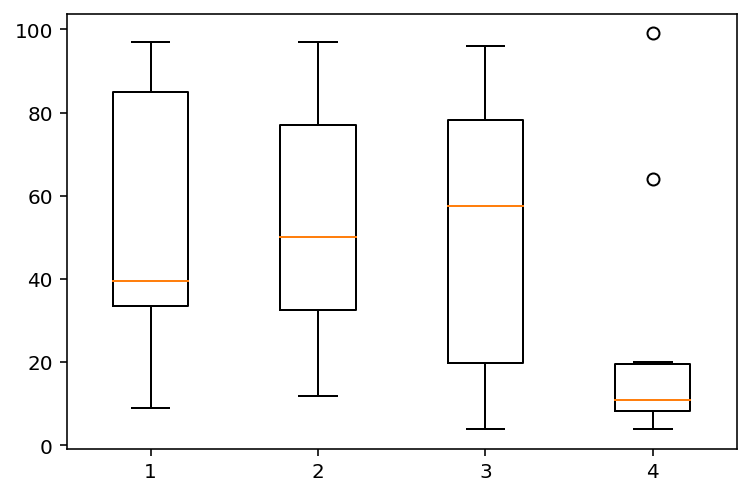

In [42]:
plot_data = [A, B, C, D]
plt.boxplot(plot_data)
plt.show()

In [46]:
F_statistic, pVal = stats.f_oneway(A, B, C, D)

print('A, B, C, D의 일원분산분석 결과 : F={0:.4f}, p={1:.8f}'.format(F_statistic, pVal))
if pVal < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미합니다.')
else :
  print('통계적으로 유의미 하지않습니다.')

A, B, C, D의 일원분산분석 결과 : F=1.7250, p=0.17920877
통계적으로 유의미 하지않습니다.
